# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [3]:
def dice(n):
    total = []
    for i in range(n):
        total.append(random.randint(1, 6))
    return total

sample = pd.DataFrame(dice(10),columns={"values"})

In [4]:
sample

,values
0,2
1,3
2,1
3,6
4,5
5,5
6,5
7,4
8,6
9,4


#### 2.- Plot the results sorted by value.

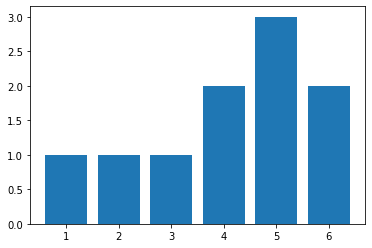

In [5]:
#Plotting
sample1 = sample.groupby('values')['values'].count()
plt.bar(sample1.index, sample1.values)
plt.show()


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

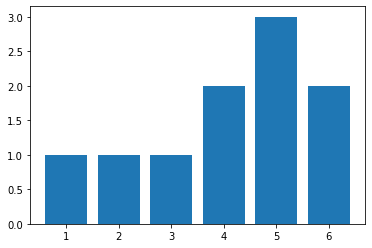

In [58]:
#Plotting
sample1 = sample.groupby('values')['values'].count()
plt.bar(sample1.index, sample1.values)
plt.show()

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
def mean_value(lst):
    total_sum= 0
    n=len(lst)
    for x in lst:
        total_sum += x
    return total_sum/n

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# Calculating the mean with the function
print(mean_value(sample['values']))


4.1


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [8]:
def median_value(lst):
    n = len(lst) 
    lst.sort() 
  
    if n % 2 == 0: 
        median1 = lst[n//2] 
        median2 = lst[n//2 - 1] 
        median = (median1 + median2)/2
    else: 
        median = lst[n//2] 
        
    return median

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [13]:
def quartiles(lst):
    n = len(lst)
    lst.sort()
    q1= (n+1)/4
    q2= median_value
    q3= 3*(n+1)/4
    return q1,q2,q3

In [14]:
print(quartiles(sample['values']))

(2.75, <function median_value at 0x0000020EE0828D38>, 8.25)


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

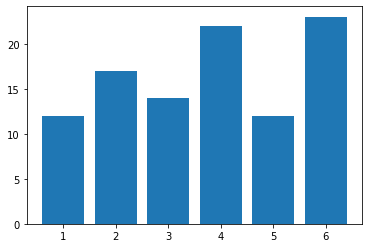

In [17]:
# Importing data

dice_100 = pd.read_csv(r"C:\Users\pao-l\Documents\GitHub\lab-understanding-descriptive-stats\data\roll_the_dice_hundred.csv")

dice_100.sort_values(by=['value'])

#Plotting

d100 = dice_100.groupby('value')['value'].count()

plt.bar(d100.index,d100.values)
plt.show()


#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [18]:
mean_value(dice_100['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [21]:
d100 = dice_100.groupby('value')['value'].count()
d100

value
1    12
2    17
3    14
4    22
5    12
6    23
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

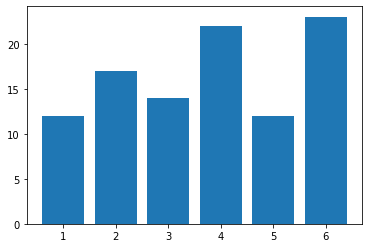

In [22]:
#Plotting

d100 = dice_100.groupby('value')['value'].count()

plt.bar(d100.index,d100.values)
plt.show()

In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [24]:
# your code here

dice_1000 = pd.read_csv(r"C:\Users\pao-l\Documents\GitHub\lab-understanding-descriptive-stats\data\roll_the_dice_thousand.csv")

#Frequency distribution
d1000 = dice_1000.groupby('value')['value'].count()
d1000


value
1    175
2    167
3    175
4    168
5    149
6    166
Name: value, dtype: int64

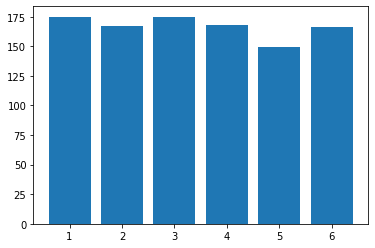

In [25]:
#Plotting
plt.bar(d1000.index,d1000.values)
plt.show()


In [ ]:
"""
The variance between the count of the different values of the dice is less high. This shows a histrogram more evenly distributed
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [28]:
# Importing the data
ages_pop = pd.read_csv(r"C:\Users\pao-l\Documents\GitHub\lab-understanding-descriptive-stats\data\ages_population.csv")
ages_pop.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


<function matplotlib.pyplot.show(*args, **kw)>

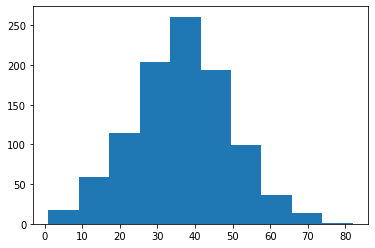

In [37]:
#Plotting
plt.hist(ages_pop['observation'])
plt.show

In [ ]:
#Looking at the plot I guess the mean is between 35 and 40 and the standard deviation between 10 and 15

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [35]:
# Mean
ages_pop.mean()

observation    36.56
dtype: float64

In [34]:
#Standard Deviation
ages_pop.std()

observation    12.8165
dtype: float64

In [ ]:
"""
The exact mean and standard deviation fall inside the ranges I guessed
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

<function matplotlib.pyplot.show(*args, **kw)>

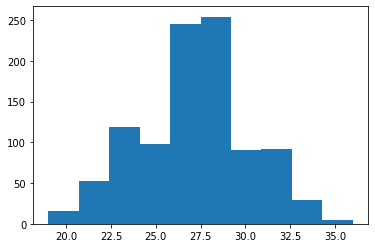

In [40]:
# Importing data
ages_pop2 = pd.read_csv(r"C:\Users\pao-l\Documents\GitHub\lab-understanding-descriptive-stats\data\ages_population2.csv")
#Plotting
plt.hist(ages_pop2['observation'])
plt.show


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
The data is not s normally distributed as the data in the file 1, and also the range of the values is lower.
This means that the people from this neighbourhood are younger people between the ages of 20 and 35
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [42]:
# Mean
ages_pop2.mean()

observation    27.155
dtype: float64

In [43]:
# Standard Deviation
ages_pop2.std()

observation    2.969814
dtype: float64

In [ ]:
"""
The mean and standard deviation are both lower than in the first distribution. 
The values in the second file are less spread from the mean
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [45]:
# Importing data

ages_pop3 = pd.read_csv(r"C:\Users\pao-l\Documents\GitHub\lab-understanding-descriptive-stats\data\ages_population3.csv")
ages_pop3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


<function matplotlib.pyplot.show(*args, **kw)>

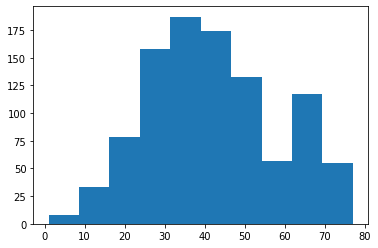

In [48]:
#Plotting
plt.hist(ages_pop3['observation'])
plt.show

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [49]:
# Mean
np.mean(ages_pop3)

observation    41.989
dtype: float64

In [50]:
#Standard deviation
np.std(ages_pop3)

observation    16.136632
dtype: float64

In [ ]:
"""
This values are closer to the ones in the first distribution.
However, the values in file 3 are more spread from the mean than the first file
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [51]:
# Calculating the quantiles
import numpy as np

print("Q1 quantile: ", np.quantile(ages_pop3['observation'], .25)) 
print("Q2 quantile: ", np.quantile(ages_pop3['observation'], .50)) 
print("Q3 quantile: ", np.quantile(ages_pop3['observation'], .75)) 

Q1 quantile:  30.0
Q2 quantile:  40.0
Q3 quantile:  53.0


In [ ]:
"""
The difference between the median and the mean is 1.989. 
When a data set has a symmetrical distribution, the mean and the median are close together because the middle value in the data set, 
when ordered smallest to largest, resembles the balancing point in the data, which occurs at the average.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

<function matplotlib.pyplot.show(*args, **kw)>

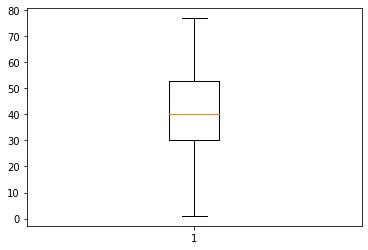

In [55]:
# your code here
plt.boxplot(ages_pop3['observation'])
plt.show

In [56]:
ages_pop3['observation'].max()

77.0

In [57]:
ages_pop3['observation'].min()

1.0

In [ ]:
"""
The minimum value of tha age of the population is 0 and the maximum 77
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""